In [125]:
from bs4 import BeautifulSoup
import requests
import time
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
def start_request(url):
    page=requests.get(url)
    return page

In [106]:
def get_parser(page):
    bs=BeautifulSoup(page.text)
    return bs

In [107]:
names=[]
prices=[]
links=[]
sold_items=[]

In [108]:
def parse(bs):
    #parsing title of an item
    for name in bs.select('h3.s-item__title'):
        if not name.text:
            continue
        names.append(name.text)
    print(len(names))
    #parsing price of an item
    for price in bs.select('span.s-item__price'):
        if 'to' in price.text:
            prices.append(float(price.text.split('to')[0][1:]))
        elif ',' in price.text:
            prices.append(float(price.text.split(',')[0][1:]+price.text.split(',')[1]))
        else:
            prices.append(float(price.text[1:]))
    print(len(prices))
    #parsing link to the item
    for link in bs.select('div.s-item__info a.s-item__link'):
        links.append(link.get('href'))
    print(len(links))
    iterator=1
    #parsing sold items through page of the item 
    for url in links:
        print(f'iterating over page{iterator}')
        iterator+=1
        r=start_request(url)
        soup=get_parser(r)
        try:
            if soup.find('span',class_='w2b-subhead').text =='Sold':
                if ',' in soup.find('span',class_='w2b-head').text:
                    sold_items.append(int(soup.find('span',class_='w2b-head').text.split(',')[0]+soup.find('span',class_='w2b-head').text.split(',')[1]))
                else:
                    sold_items.append(int(soup.find('span',class_='w2b-head').text))
                print(soup.find('span',class_='w2b-head').text) 
            else:
                sold_items.append(0)
        except:
            sold_items.append(0)
            continue
        time.sleep(1)
    print(sold_items)

In [109]:
reponse=start_request('https://www.ebay.com/sch/i.html?_from=R40&_trksid=p2334524.m570.l1313&_nkw=watch&_sacat=0&LH_TitleDesc=0&_odkw=gaming+laptop&_sop=12')

In [110]:
bs=get_parser(reponse)

In [111]:
parse(bs)

63
63
64
iterating over page1
iterating over page2
1,228
iterating over page3
iterating over page4
84
iterating over page5
iterating over page6
iterating over page7
iterating over page8
233
iterating over page9
iterating over page10
iterating over page11
iterating over page12
60
iterating over page13
iterating over page14
iterating over page15
iterating over page16
27
iterating over page17
135
iterating over page18
iterating over page19
iterating over page20
iterating over page21
iterating over page22
iterating over page23
iterating over page24
iterating over page25
iterating over page26
380
iterating over page27
iterating over page28
iterating over page29
iterating over page30
iterating over page31
iterating over page32
iterating over page33
iterating over page34
iterating over page35
iterating over page36
100
iterating over page37
iterating over page38
iterating over page39
iterating over page40
iterating over page41
iterating over page42
39
iterating over page43
iterating over page4

In [112]:
sold_items.pop()
links.pop()

'https://www.ebay.com/itm/134002484738?_trkparms=ispr%3D1&hash=item1f332ba602:g:U5MAAOSwpMFh7EVl&amdata=enc%3AAQAGAAACkPYe5NmHp%252B2JMhMi7yxGiTJkPrKr5t53CooMSQt2orsSHYXPhGXR5uguexJBeHwfgaA1IwxMClW0xlcKQcQNa%252BY0CIp1EEddjbQyF8XX5AsyCZKPIPUGY0bCoog%252FOfcfhsK0LntAA8mOGxb2tcqNcr60UpKG2KYLeUs2r83LFQEredXB4NBmP7d3AEy1%252FI8gGG78EKqPqesWxHnRiuJycVX1Fs2zCPkvaCzcvV2jo53SRfq1gG9xntsdrm5cpue%252B%252Br%252B3bEzjI8lMOd%252FXyusXu5tiYDcjZYR4DE2OR7Qb3GYVmyaduCLeDe5xpx%252FQ%252FR1BvyclThgCka%252Bz13dMs%252FlaaiET4FKhw92jyRiwE9PHgKE%252Fb0%252Bw7f5OKbR8VBAW0DkWdPIUzIWLL%252F4XTrAM%252ByRA3RhrVo9SLpCdxm6xDKjorpwih5sAs9Nw90gwXAUsyhCghn2lE8Vu08Xx3WIvVN5YQr%252FeteQIok72aMoaC9oHf8JMd0MZUCytAG3KtGZOuDhtL%252BPakxgH%252FQaTABEDW6tZSyvpY3AKgZKXjy24sr1gvNViPTHQSGtteOqCsea1nW2kyORfIy4XEddtMkp2XU71e8Ol23aiD4XEsVx0W6V0a%252BI9sVqzFxqIKdjTPumQ520GV1KFk7thPZl4xmtbL4GfOiQLFsXFeuh1k5UdPNSytINI2f37O%252BTz6TnPVhAxhy950RNo7zSwu85mKtaSwcVS53YT%252BlUIsNVMT55QygupEFAV7pHi4FqUIXk6FMkQu%252BO9fWM1qTIjZEcUcLIQ0IccAI

In [114]:
len(sold_items),len(links),len(names),len(prices)

(63, 63, 63, 63)

In [115]:
dic=dict()
dic['name']=names
dic['price']=prices
dic['link']=links
dic['sold_items']=sold_items

In [116]:
df=pd.DataFrame(dic)

In [118]:
df.to_csv('output')

In [120]:
df[df['price']==min(df['price'])]

,name,price,link,sold_items
5,Casio Illuminator Sports Watch,9.22,https://www.ebay.com/itm/294750133250?hash=ite...,0


In [121]:
df[df['sold_items']==max(df['sold_items'])]

,name,price,link,sold_items
1,Casio Classic F-91W Watch Men Luxury Classic G...,10.0,https://www.ebay.com/itm/172635663886?_trkparm...,1228


In [130]:
df.describe()

,price,sold_items
count,63.000000,63.000000
mean,295.487302,36.285714
std,499.974418,163.867317
min,9.220000,0.000000
25%,22.530000,0.000000
50%,78.820000,0.000000
75%,299.200000,0.000000
max,2428.200000,1228.000000


This means that the average price is 295 and the average of sold items is 36

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        63 non-null     object 
 1   price       63 non-null     float64
 2   link        63 non-null     object 
 3   sold_items  63 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.1+ KB


the data has no null type.. price feature is float and sold items is int type

(array([46.,  6.,  1.,  3.,  4.,  0.,  0.,  2.,  0.,  1.]),
 array([   9.22 ,  251.118,  493.016,  734.914,  976.812, 1218.71 ,
        1460.608, 1702.506, 1944.404, 2186.302, 2428.2  ]),
 <BarContainer object of 10 artists>)

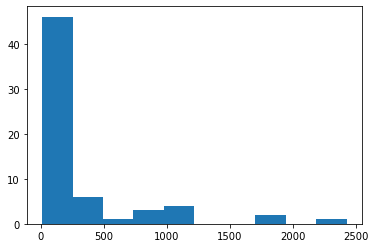

In [134]:
plt.hist(df['price'])

most prices are in range between 0 and 250